In [1]:
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
air_quality = pd.read_csv('./dataset/melbourne-cbd-australia-air-quality.csv')
air_quality['date'] = pd.to_datetime(air_quality['date'])
air_quality = air_quality[air_quality['date'] >= '2017-06-30']
air_quality.rename(columns={'date': 'day'}, inplace=True)
air_quality.sort_values(by='day')


,day,pm25,pm10,o3,no2,so2,co
1211,2017-06-30,33,,,,,
1080,2017-07-01,57,,,,,
1081,2017-07-02,33,,,,,
1082,2017-07-03,29,,,,,
1083,2017-07-04,13,,,,,
...,...,...,...,...,...,...,...
11,2020-10-12,23,,,,,
12,2020-10-13,31,,,,,
13,2020-10-14,31,,,,,
14,2020-10-15,24,,,,,


In [3]:
air_quality.reset_index()


,index,day,pm25,pm10,o3,no2,so2,co
0,0,2020-10-01,25,,,,,
1,1,2020-10-02,25,,,,,
2,2,2020-10-03,18,,,,,
3,3,2020-10-04,33,,,,,
4,4,2020-10-05,12,,,,,
...,...,...,...,...,...,...,...,...
1162,1162,2017-09-27,31,,,,,
1163,1163,2017-09-28,25,,,,,
1164,1164,2017-09-29,19,,,,,
1165,1165,2017-09-30,17,,,,,


In [4]:
daily_data = pd.read_csv('./preprocessed/daily_data.csv')

In [5]:
daily_data['day'] = pd.to_datetime(daily_data['day'])
daily_data = daily_data[daily_data['day'] >= '2017-06-30']
daily_data.sort_values(by='day')
# daily_data.set_index('day')

,day,temp_min,temp_max,feels_like,pressure,humidity,wind_speed,wind_deg,is_offday,demand,rrp
911,2017-06-30,4.725000,9.983750,4.474167,1030.041667,74.458333,2.084583,210.958333,0,278551.55,5867.17
912,2017-07-01,3.310417,7.550000,1.279583,1029.208333,71.166667,3.330417,205.208333,1,251899.00,5465.09
913,2017-07-02,3.349583,8.948750,2.192500,1023.208333,60.208333,3.284167,124.666667,1,240274.90,5192.26
914,2017-07-03,6.514167,10.907083,5.442917,1011.500000,66.375000,3.325000,122.500000,0,279530.64,7005.94
915,2017-07-04,9.945833,12.887500,8.375417,1007.541667,71.875000,4.020833,322.916667,0,268059.61,6197.10
...,...,...,...,...,...,...,...,...,...,...,...
2096,2020-09-27,7.632917,11.917917,5.662083,1024.416667,72.250000,4.370833,203.125000,1,203406.98,2546.82
2097,2020-09-28,7.253750,11.949583,6.875417,1027.041667,74.416667,2.401667,187.166667,0,229302.28,2704.58
2098,2020-09-29,10.448333,14.254167,8.205000,1020.958333,66.416667,4.604167,219.583333,0,224152.92,1953.21
2099,2020-09-30,12.799600,16.258800,10.769200,1010.400000,71.920000,5.688000,308.800000,0,227240.42,1786.40


In [6]:
mergedStuff = pd.merge(daily_data, air_quality, on=['day'], how='inner')
mergedStuff

,day,temp_min,temp_max,feels_like,pressure,humidity,wind_speed,wind_deg,is_offday,demand,rrp,pm25,pm10,o3,no2,so2,co
0,2017-06-30,4.725000,9.983750,4.474167,1030.041667,74.458333,2.084583,210.958333,0,278551.55,5867.17,33,,,,,
1,2017-07-01,3.310417,7.550000,1.279583,1029.208333,71.166667,3.330417,205.208333,1,251899.00,5465.09,57,,,,,
2,2017-07-02,3.349583,8.948750,2.192500,1023.208333,60.208333,3.284167,124.666667,1,240274.90,5192.26,33,,,,,
3,2017-07-03,6.514167,10.907083,5.442917,1011.500000,66.375000,3.325000,122.500000,0,279530.64,7005.94,29,,,,,
4,2017-07-04,9.945833,12.887500,8.375417,1007.541667,71.875000,4.020833,322.916667,0,268059.61,6197.10,13,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2020-09-27,7.632917,11.917917,5.662083,1024.416667,72.250000,4.370833,203.125000,1,203406.98,2546.82,21,,,,,
1148,2020-09-28,7.253750,11.949583,6.875417,1027.041667,74.416667,2.401667,187.166667,0,229302.28,2704.58,29,,,,,
1149,2020-09-29,10.448333,14.254167,8.205000,1020.958333,66.416667,4.604167,219.583333,0,224152.92,1953.21,27,,,,,
1150,2020-09-30,12.799600,16.258800,10.769200,1010.400000,71.920000,5.688000,308.800000,0,227240.42,1786.40,18,,,,,


In [18]:
mergedStuff.corr()[['demand',' pm25']]

,demand,pm25
temp_min,-0.127373,0.242777
temp_max,-0.108284,0.253137
feels_like,-0.083890,0.292996
pressure,0.130454,0.100690
humidity,0.131770,0.067281
wind_speed,-0.143255,-0.209437
wind_deg,0.041248,-0.328314
is_offday,-0.475084,-0.003488
demand,1.000000,0.162483
rrp,0.299777,0.067204


In [8]:
air_quality_before_covid = air_quality[(air_quality['day'] >= '2019-03-01') & (air_quality['day'] < '2019-09-01')]
air_quality_before_covid

,day,pm25,pm10,o3,no2,so2,co
371,2019-07-01,16,,,,,
372,2019-07-02,14,,,,,
373,2019-07-03,34,,,,,
374,2019-07-04,39,,,,,
375,2019-07-05,75,,,,,
...,...,...,...,...,...,...,...
632,2019-03-27,35,,,,,
633,2019-03-28,28,,,,,
634,2019-03-29,28,,,,,
635,2019-03-30,17,,,,,


In [9]:
air_quality_before_covid['day'] = pd.to_datetime(air_quality_before_covid['day'])
air_quality_before_covid = air_quality_before_covid.groupby(pd.Grouper(key='day', freq='1M')).mean().reset_index()
air_quality_before_covid






/Users/gazzaazhari/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,day,pm25
0,2019-03-31,33.633333
1,2019-04-30,27.481481
2,2019-05-31,24.700000
3,2019-06-30,28.866667
4,2019-07-31,24.387097
5,2019-08-31,21.000000


In [10]:
air_quality_during_covid = air_quality[(air_quality['day'] >= '2020-03-01') & (air_quality['day'] < '2020-09-01')]
air_quality_during_covid['day'] = pd.to_datetime(air_quality_during_covid['day'])
air_quality_during_covid = air_quality_during_covid.groupby(pd.Grouper(key='day', freq='1M')).mean().reset_index()
air_quality_during_covid



/Users/gazzaazhari/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,day,pm25
0,2020-03-31,23.464286
1,2020-04-30,24.700000
2,2020-05-31,26.516129
3,2020-06-30,37.366667
4,2020-07-31,32.833333
5,2020-08-31,22.612903


<AxesSubplot:xlabel='day'>

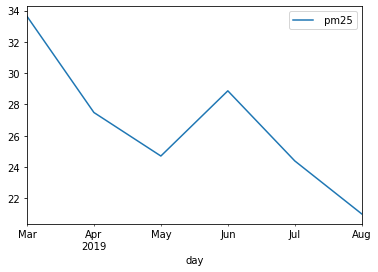

In [11]:
air_quality_before_covid.plot(x='day', y=' pm25')

In [12]:
air_quality_sum = air_quality_before_covid.append(air_quality_during_covid, ignore_index=True)


In [13]:
# pd.to_datetime(df_entertainment['Period'])
air_quality_sum['year'] = pd.DatetimeIndex(air_quality_sum['day']).year

air_quality_sum['day'] = pd.DatetimeIndex(air_quality_sum['day']).strftime('%b')
# air_quality_sum['day'] = pd.to_datetime(air_quality_sum['day'], format='%m').dt.month_name().str.slice(stop=3)


In [14]:
air_quality_sum

,day,pm25,year
0,Mar,33.633333,2019
1,Apr,27.481481,2019
2,May,24.700000,2019
3,Jun,28.866667,2019
4,Jul,24.387097,2019
5,Aug,21.000000,2019
6,Mar,23.464286,2020
7,Apr,24.700000,2020
8,May,26.516129,2020
9,Jun,37.366667,2020


/Users/gazzaazhari/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


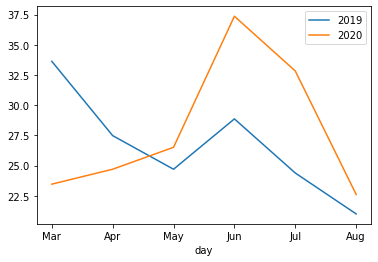

In [15]:
fig, ax = plt.subplots()

air_quality_sum.groupby('year').plot(x='day', y=' pm25', ax=ax)
plt.legend(air_quality_sum['year'].unique())
